In [1]:
import torch#loads YOLO model 
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')#loads the pretrained model-our baseline detection model

Using cache found in C:\Users\Gyanvi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-2 Python-3.9.13 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img='img1.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 3 persons, 3 chairs
Speed: 590.1ms pre-process, 34.6ms inference, 119.0ms NMS per image at shape (1, 3, 384, 640)


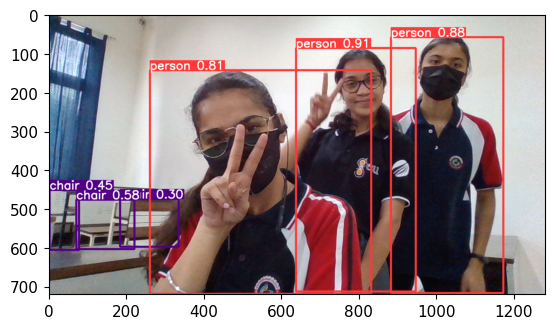

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
#real time detection
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    #make detection
    #pass the frame that we capture from web cam
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze((results.render())))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
import uuid #unique identifier
import os
import time

In [8]:
#training on  custom labels 
#capture and save
IMAGES_PATH=os.path.join('data','images')#data/images
labels=['Awake','Drowsy']#2 classes of image
number_images=20#for each class 20 images so we have two classes so a total of 40 images

In [22]:
cap=cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)#sleep for 5 seconds when we are transitioning for different labels
    #loop through image range
    for img in range(number_images):
        print("Collecting image for {},image number {}".format (label,img))
        #web cam feed
        ret,frame=cap.read()
        #naming out images path
        img_name=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
       
        cv2.imwrite(img_name,frame)
        
        #render to screen
        cv2.imshow('IMAGE COLLECTION',frame)
        
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
         break
cap.release()
cv2.destroyAllWindows()
        

^C
Error in callback <function _draw_all_if_interactive at 0x0000022832371820> (for post_execute):


KeyboardInterrupt: 